In [1]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import matplotlib.pylab as plt   

bn = 'worm-eggs-adam-masks+Feggs+roi128+hard-neg-5_clf+unet-simple_maxlikelihood_20190808_151948_adam_lr0.000128_wd0.0_batch64'
#EVENTS_DIR = Path.home() / 'workspace/WormData/egg_laying_test/' / bn
EVENTS_DIR = Path.home() / 'OneDrive - Nexus365/worms/eggs/egg_laying' / bn
DIVERGENT_SET = ['CB4856', 'N2',  'DL238', 'CX11314', 'MY23', 'JU775', 'JT11398',
       'EG4725', 'LKC34', 'ED3017', 'MY16', 'JU258']

files_data = pd.read_pickle(EVENTS_DIR / 'files_data.pkl')


strain_basenames = {s : x for s,x in files_data.groupby('strain')}


In [2]:
for strain in DIVERGENT_SET:
    basenames = strain_basenames[strain]['basename'].values
    
    strain_ts_data = []
    for bn in tqdm(basenames, desc = strain):
        ts_file = EVENTS_DIR / f'{bn}_timeseries.pkl'
        if ts_file.exists():
            df_ts = pd.read_pickle(ts_file)
            strain_ts_data.append(df_ts)
    strain_ts_data = pd.concat(strain_ts_data)
    break
    



CB4856: 100%|██████████| 28/28 [00:00<00:00, 66.82it/s]


In [3]:
type(strain_ts_data)

pandas.core.frame.DataFrame

In [4]:
strain_ts_data.columns 


Index(['worm_index', 'timestamp', 'speed', 'angular_velocity',
       'relative_to_body_speed_midbody',
       'relative_to_body_radial_velocity_head_tip',
       'relative_to_body_angular_velocity_head_tip',
       'relative_to_body_radial_velocity_neck',
       'relative_to_body_angular_velocity_neck',
       'relative_to_body_radial_velocity_hips',
       ...
       'coord_x_body', 'coord_y_body', 'coord_x_tail', 'coord_y_tail',
       'coord_x_midbody', 'coord_y_midbody', 'coord_x_head', 'coord_y_head',
       'timestamp_centered', 'video_id'],
      dtype='object', length=154)

JU258: 100%|██████████| 25/25 [00:00<00:00, 158.57it/s]


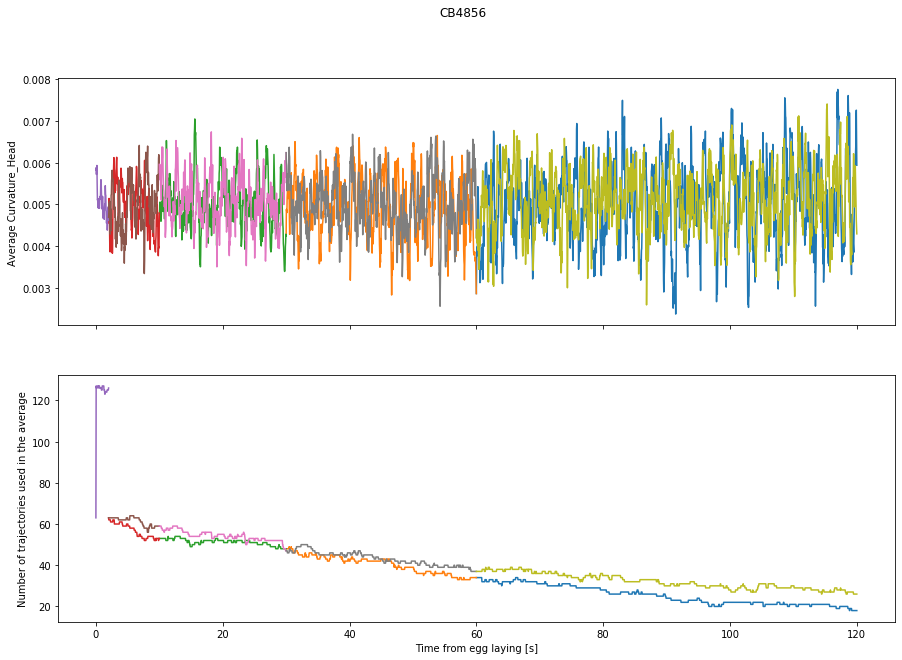

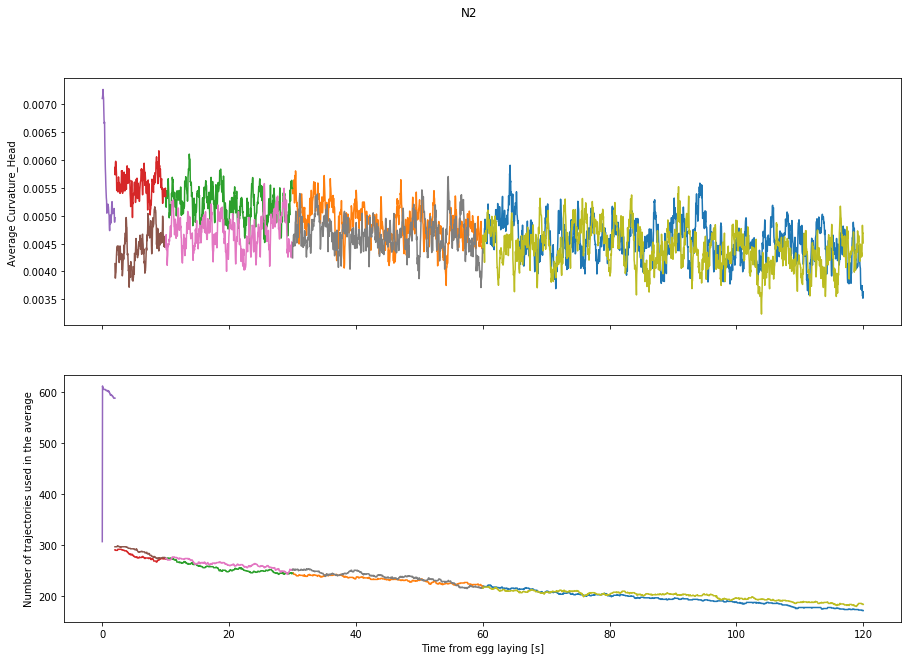

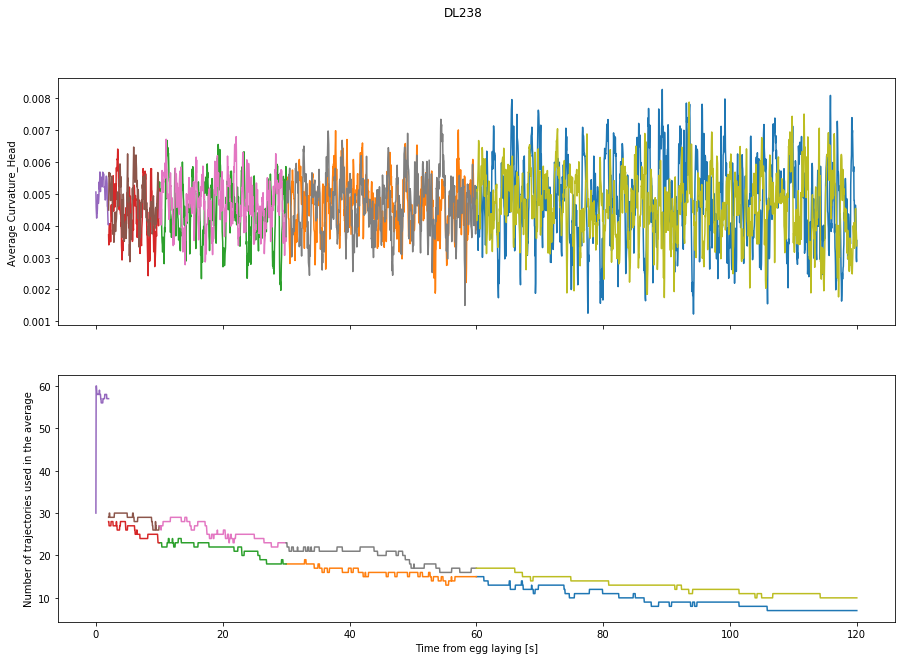

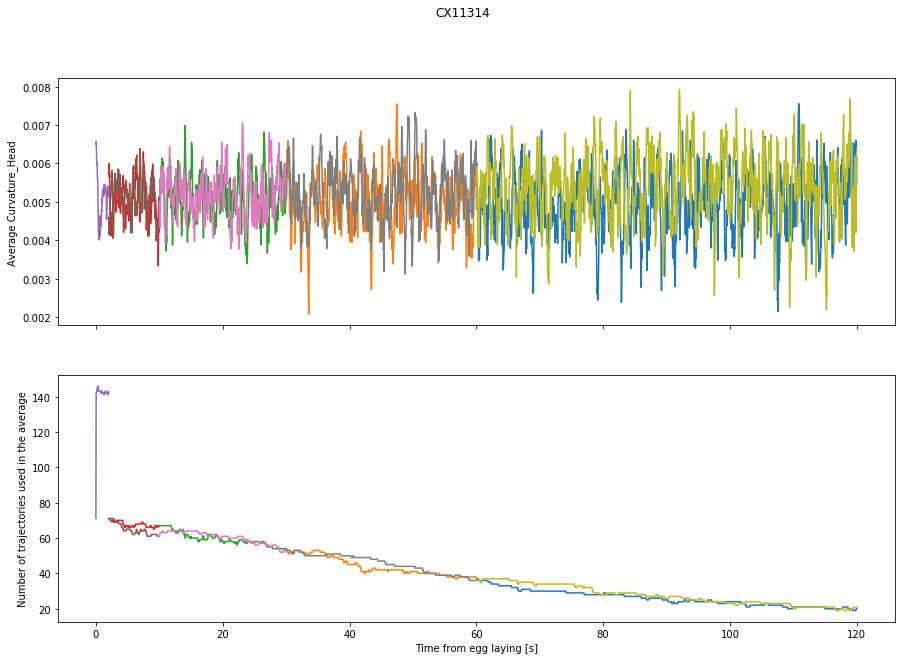

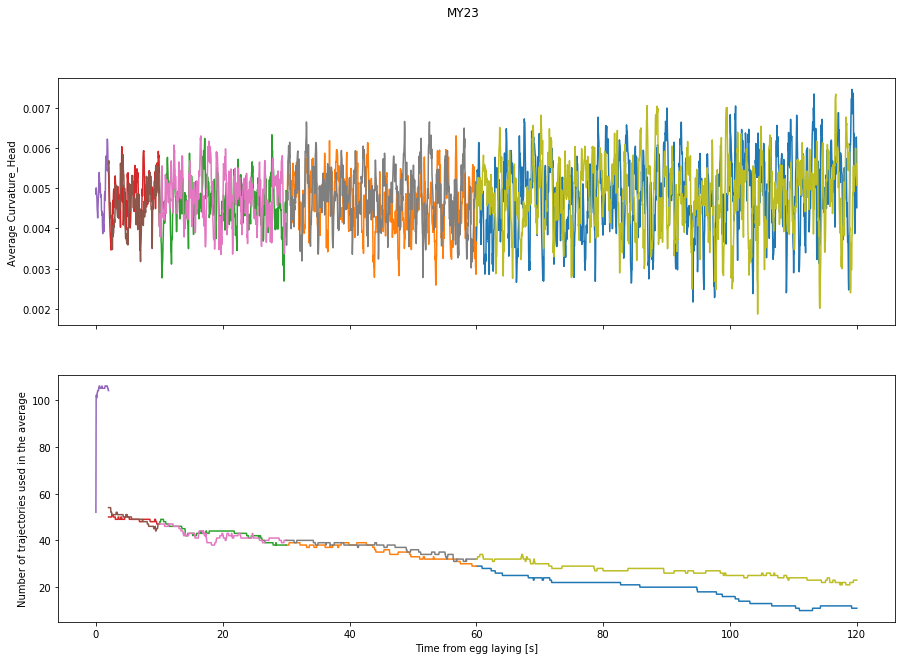

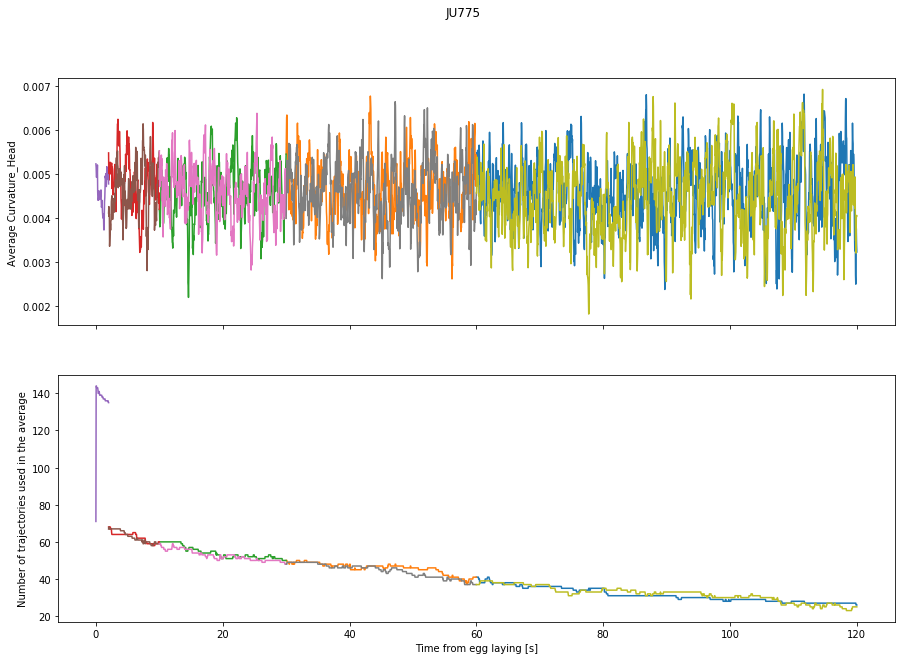

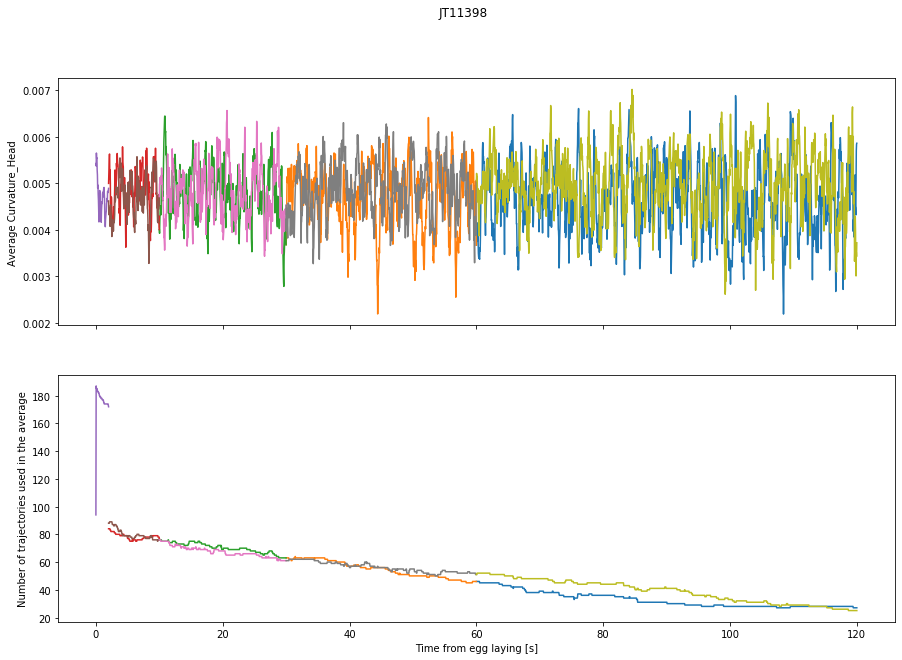

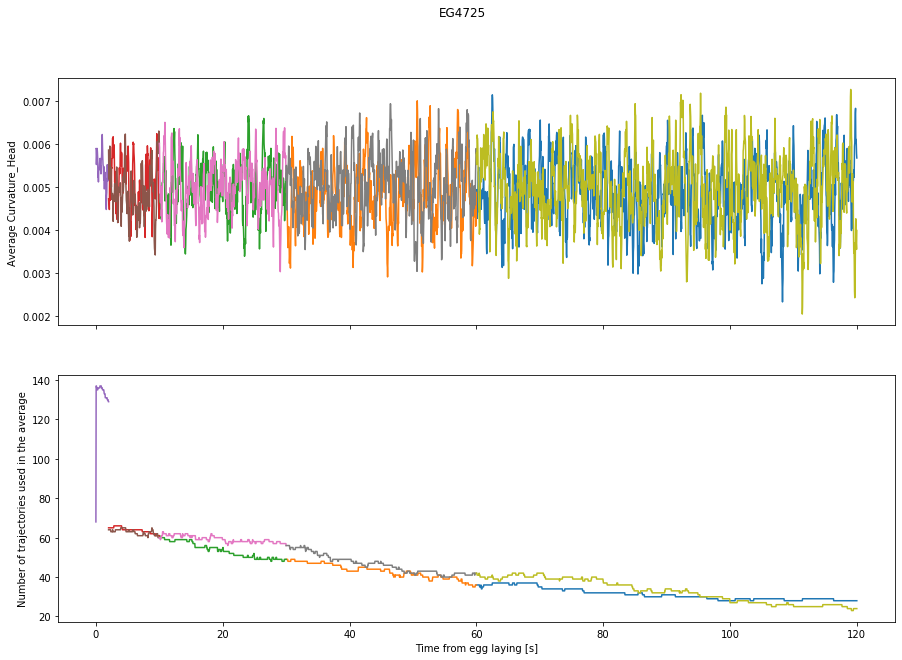

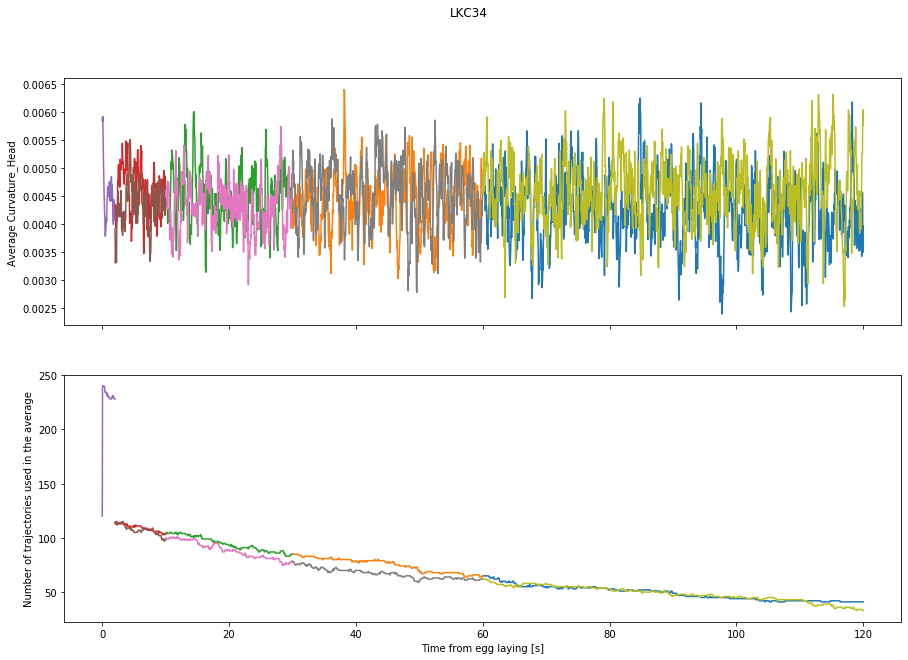

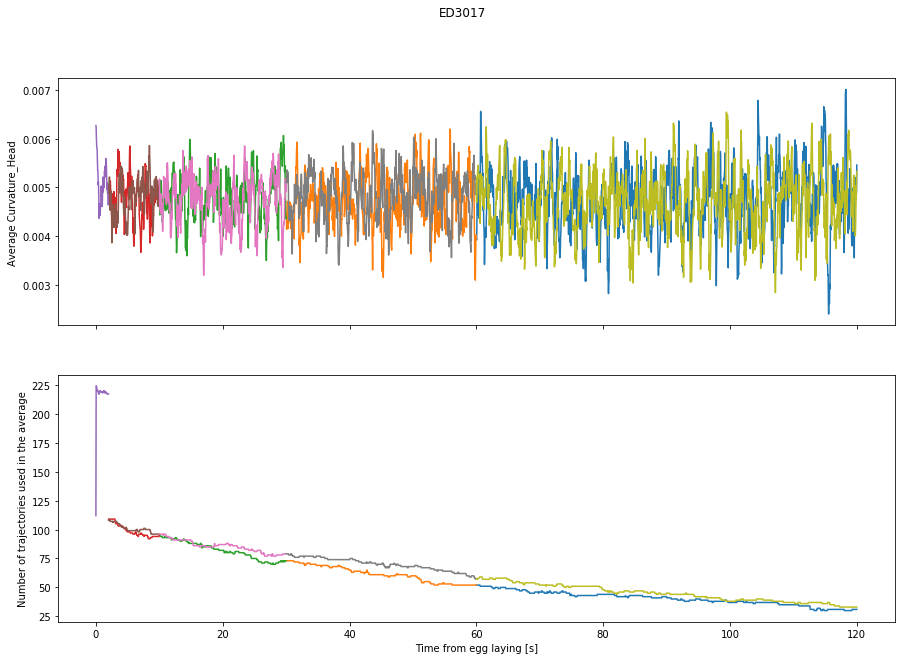

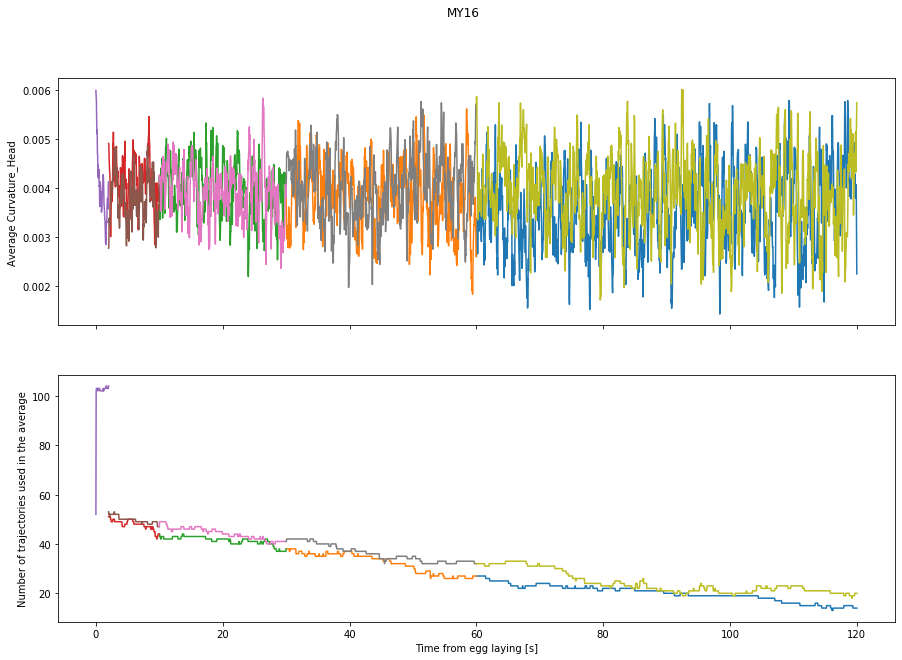

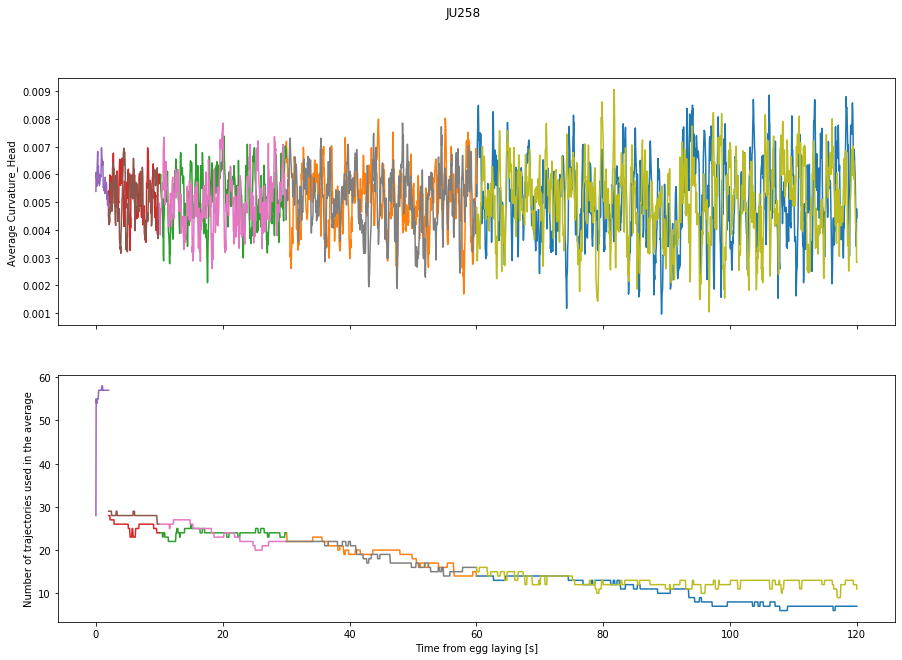

In [11]:
fps = 25
bins_times = [-120, -60, -30, -10, -2, 2, 10, 30, 60, 120]
#bins_times = [-60, -30, -10, -2, 2, 10, 30, 60]
#bins_times = [-20, -10, -2, 2, 10, 20]
#bins_times = [-10, -2, 2, 10]

bins_frames = [x*fps for x in bins_times]



for strain in DIVERGENT_SET:
    basenames = strain_basenames[strain]['basename'].values
    
    strain_ts_data = []
    for bn in tqdm(basenames, desc = strain):
        ts_file = EVENTS_DIR / f'{bn}_timeseries.pkl'
        if ts_file.exists():
            df_ts = pd.read_pickle(ts_file)
            strain_ts_data.append(df_ts)
    strain_ts_data = pd.concat(strain_ts_data)
    
    
    binned_data = []
    for x0, x1 in zip(bins_frames[:-1], bins_frames[1:]):
        good = (strain_ts_data['timestamp_centered'] >= x0) & (strain_ts_data['timestamp_centered'] <= x1)
        df_bin = strain_ts_data[good]
        binned_data.append(df_bin)


     

    feat2check = 'curvature_head'#'d_length'

    fig, axs = plt.subplots(2, 1, figsize = (15, 10), sharex = True)
    for df_bin in binned_data:
        df_bin = df_bin[['timestamp_centered', feat2check]].abs()


        df_stat = df_bin.groupby('timestamp_centered').agg(['median', 'count'])
        
        for ax, name in zip(axs, ['median', 'count']):
            dd = df_stat[feat2check][name]

            xx = dd.index.values/fps
            yy = dd.values
            ax.plot(xx, yy)
            
    plt.suptitle(strain)
    axs[0].set_ylabel(f'Average {feat2check.title()}' )
    axs[1].set_ylabel('Number of trajectories used in the average')
    axs[1].set_xlabel('Time from egg laying [s]')
    #axs[0].set_ylim((0, 200))
    
    
plt.show()

JT11398:  64%|██████▍   | 16/25 [00:06<00:03,  2.61it/s]/Users/avelinojaver/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:994: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
MY16:  76%|███████▌  | 19/25 [00:05<00:02,  2.39it/s]/Users/avelinojaver/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:994: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
JU258: 100%|██████████| 25/25 [00:03<00:00,  6.90it/s]


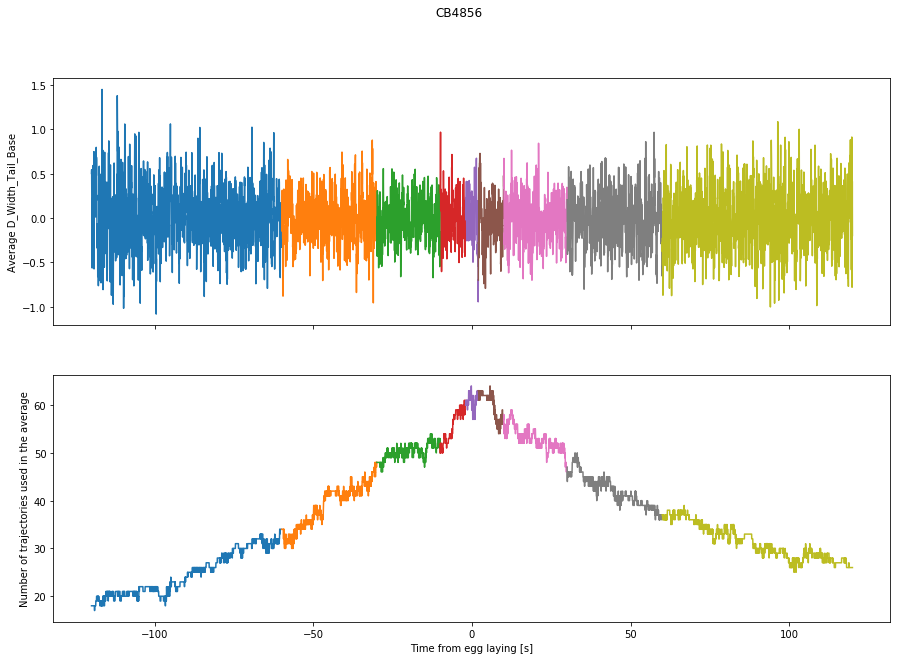

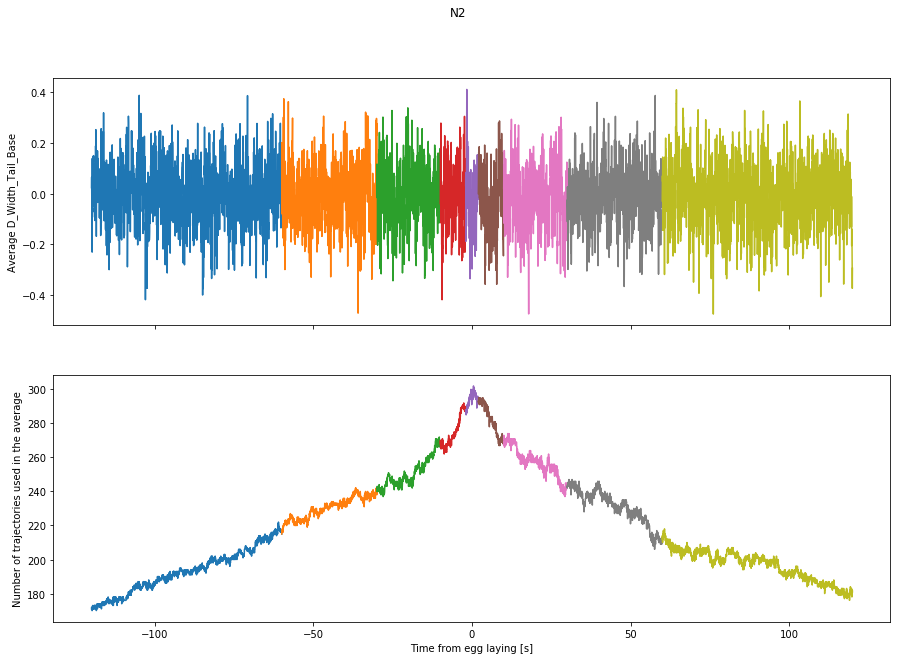

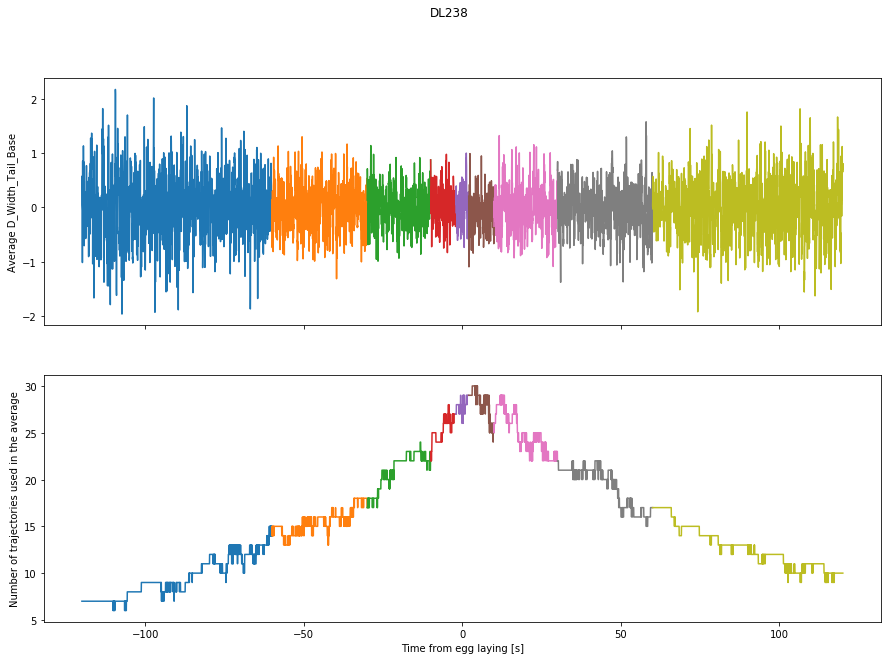

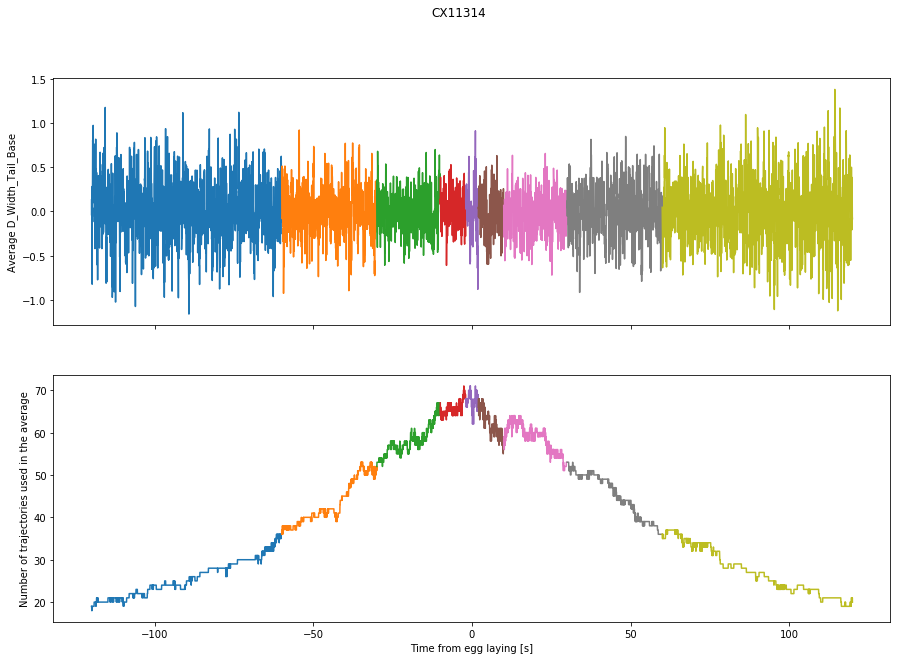

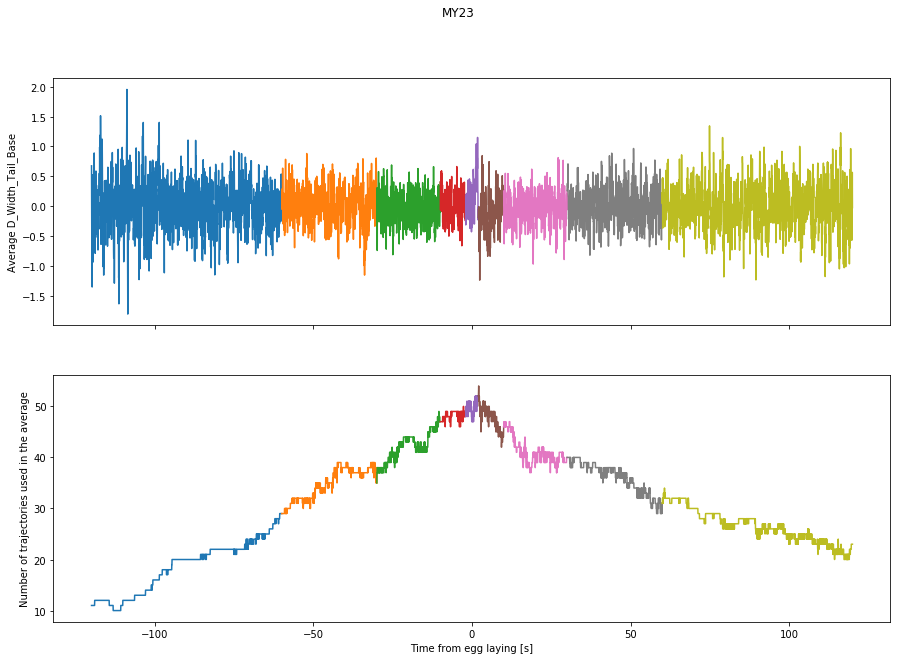

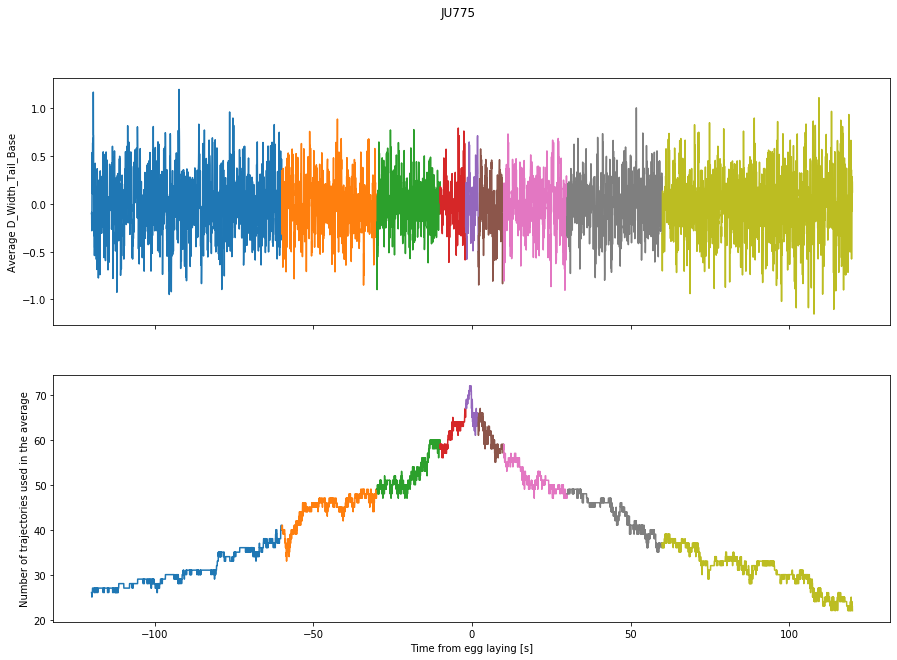

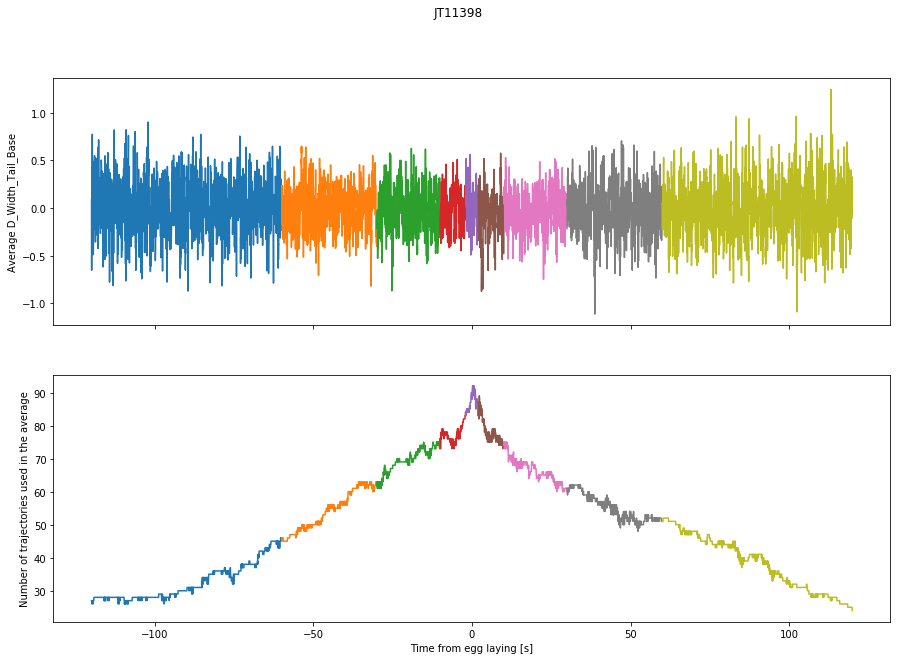

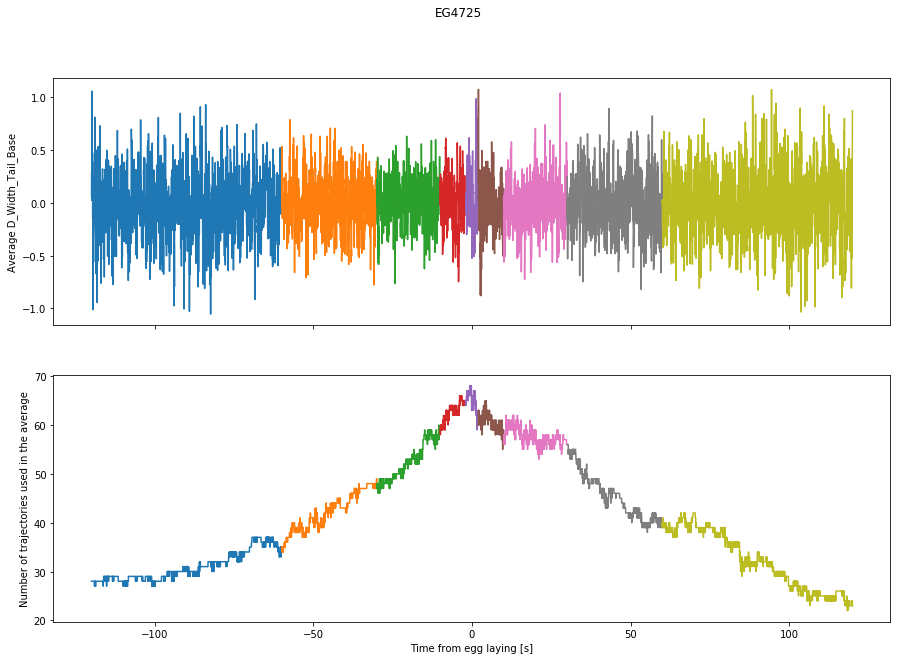

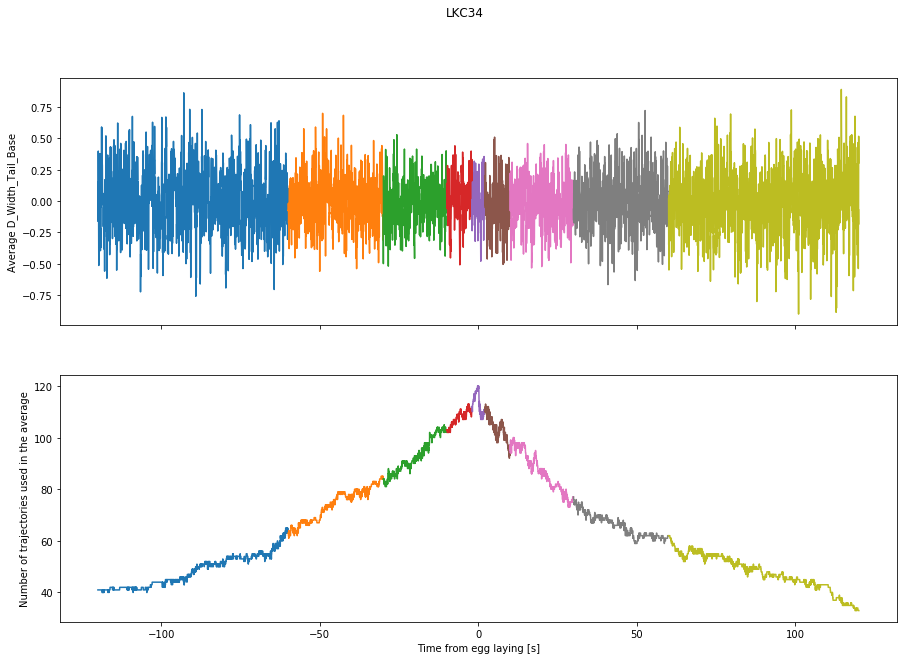

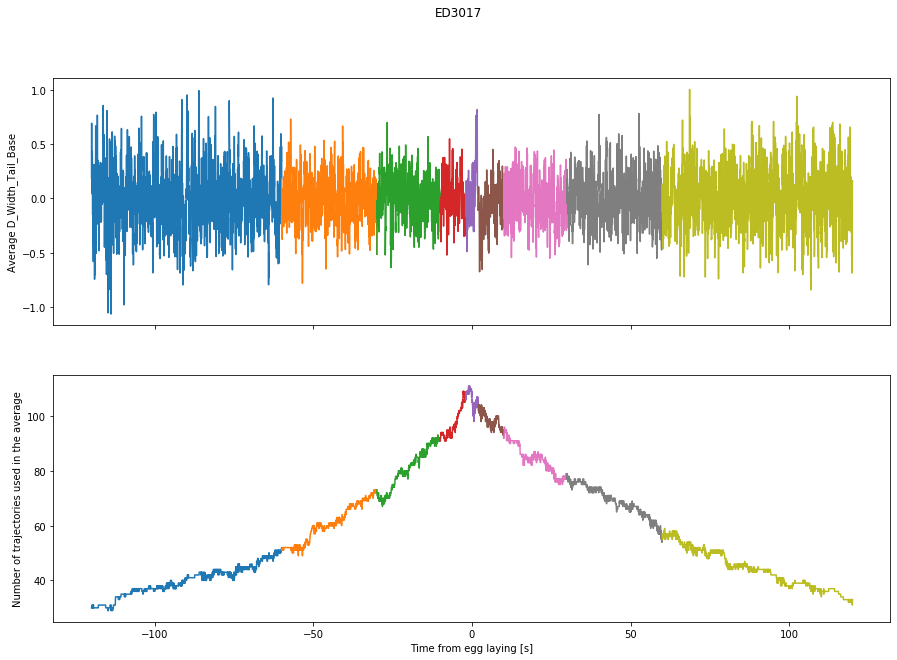

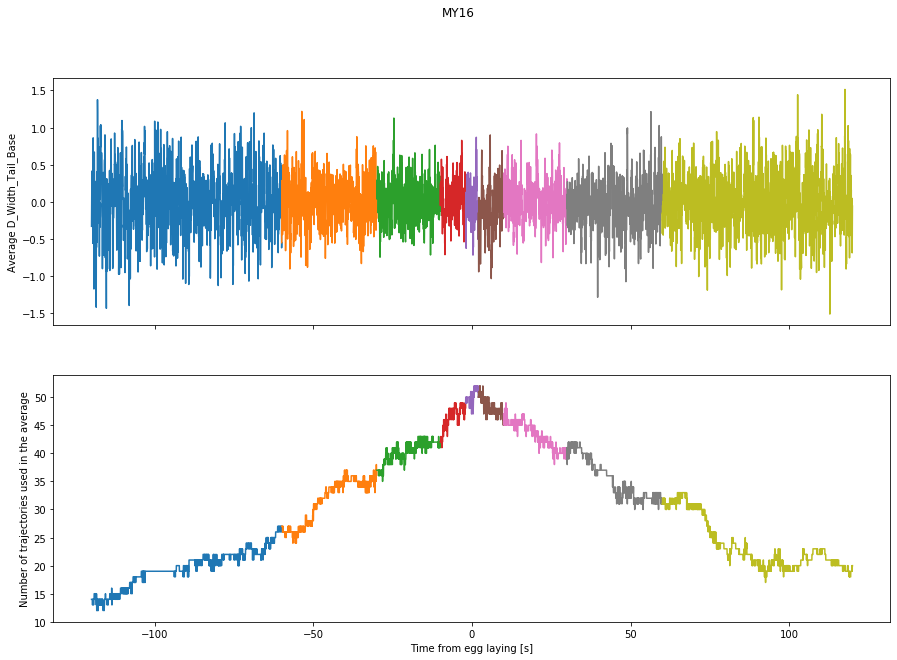

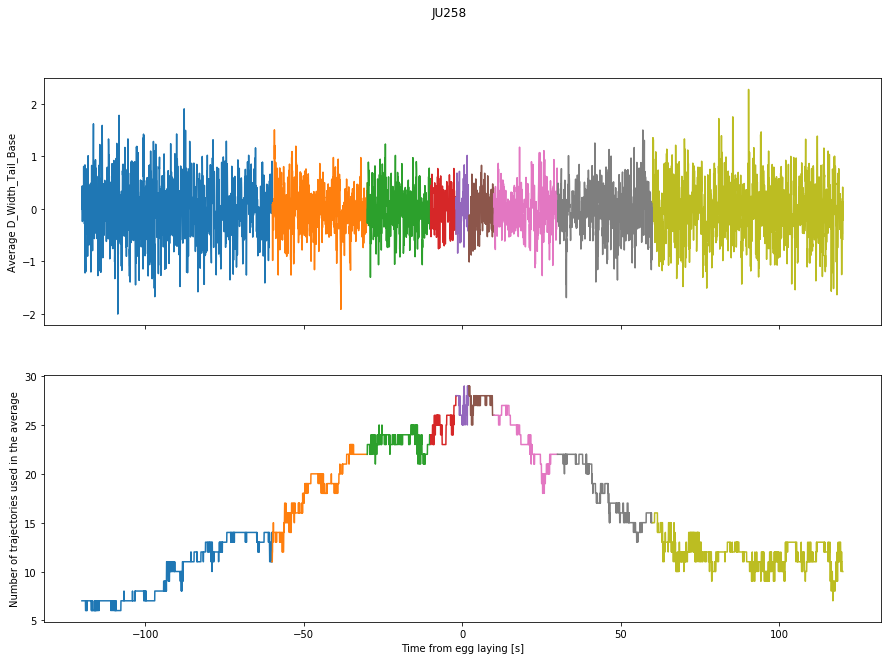

In [12]:
fps = 25
bins_times = [-120, -60, -30, -10, -2, 2, 10, 30, 60, 120]
#bins_times = [-60, -30, -10, -2, 2, 10, 30, 60]
#bins_times = [-20, -10, -2, 2, 10, 20]
#bins_times = [-10, -2, 2, 10]

bins_frames = [x*fps for x in bins_times]



for strain in DIVERGENT_SET:
    basenames = strain_basenames[strain]['basename'].values
    
    strain_ts_data_norm = []
    for bn in tqdm(basenames, desc = strain):
        ts_file = EVENTS_DIR / f'{bn}_timeseries.pkl'
        if ts_file.exists():
            df_ts = pd.read_pickle(ts_file)
            
            med = df_ts.median()
            mad = (df_ts - med).abs().median()
            df_ts_norm = (df_ts - med) / mad
            
            cols = ['worm_index', 'timestamp' , 'video_id', 'timestamp_centered']
            df_ts_norm[cols] = df_ts[cols]
            
            strain_ts_data_norm.append(df_ts_norm)
    strain_ts_data_norm = pd.concat(strain_ts_data_norm)
    
 
    
    binned_data = []
    for x0, x1 in zip(bins_frames[:-1], bins_frames[1:]):
        good = (strain_ts_data_norm['timestamp_centered'] >= x0) & (strain_ts_data_norm['timestamp_centered'] <= x1)
        df_bin = strain_ts_data_norm[good]
        binned_data.append(df_bin)


     

    feat2check = 'd_width_tail_base'#'relative_to_head_base_radial_velocity_head_tip'#'length'

    fig, axs = plt.subplots(2, 1, figsize = (15, 10), sharex = True)
    for df_bin in binned_data:
        df_bin = df_bin[['timestamp_centered', feat2check]]


        df_stat = df_bin.groupby('timestamp_centered').agg(['median', 'count'])
        
        for ax, name in zip(axs, ['median', 'count']):
            dd = df_stat[feat2check][name]

            xx = dd.index.values/fps
            yy = dd.values
            ax.plot(xx, yy)
            
    plt.suptitle(strain)
    axs[0].set_ylabel(f'Average {feat2check.title()}' )
    axs[1].set_ylabel('Number of trajectories used in the average')
    axs[1].set_xlabel('Time from egg laying [s]')
    #axs[0].set_ylim((0, 200))
    
    
plt.show()

In [ ]:
fps = 25
bins_times = [-120, -60, -30, -10, -2, 2, 10, 30, 60, 120]
#bins_times = [-60, -30, -10, -2, 2, 10, 30, 60]
#bins_times = [-20, -10, -2, 2, 10, 20]
#bins_times = [-10, -2, 2, 10]

bins_frames = [x*fps for x in bins_times]



for strain in DIVERGENT_SET:
    basenames = strain_basenames[strain]['basename'].values
    
    strain_ts_data_norm = []
    for bn in tqdm(basenames, desc = strain):
        ts_file = EVENTS_DIR / f'{bn}_timeseries.pkl'
        if ts_file.exists():
            df_ts = pd.read_pickle(ts_file)
            
            m = df_ts.mean()
            s = df_ts.std()
            df_ts_norm = (df_ts - m) / s
            
            cols = ['worm_index', 'timestamp' , 'video_id', 'timestamp_centered']
            df_ts_norm[cols] = df_ts[cols]
            
            strain_ts_data_norm.append(df_ts_norm)
    strain_ts_data_norm = pd.concat(strain_ts_data_norm)
    
 
    
    binned_data = []
    for x0, x1 in zip(bins_frames[:-1], bins_frames[1:]):
        good = (strain_ts_data_norm['timestamp_centered'] >= x0) & (strain_ts_data_norm['timestamp_centered'] <= x1)
        df_bin = strain_ts_data_norm[good]
        binned_data.append(df_bin)


     

    feat2check = 'length'

    fig, axs = plt.subplots(2, 1, figsize = (15, 10), sharex = True)
    for df_bin in binned_data:
        df_bin = df_bin[['timestamp_centered', feat2check]]


        df_stat = df_bin.groupby('timestamp_centered').agg(['median', 'count'])
        
        for ax, name in zip(axs, ['median', 'count']):
            dd = df_stat[feat2check][name]

            xx = dd.index.values/fps
            yy = dd.values
            ax.plot(xx, yy)
            
    plt.suptitle(strain)
    axs[0].set_ylabel(f'Average {feat2check.title()}' )
    axs[1].set_ylabel('Number of trajectories used in the average')
    axs[1].set_xlabel('Time from egg laying [s]')
    #axs[0].set_ylim((0, 200))
    
    
plt.show()


    
    